# Table of Contents:

1. DataFrame:

    1. [Creating DataFrame](#Creating-DataFrame:)  
    2. [Creating Series](#Creating-Series:) 
    3. [Reading a DataFrame](#Reading-DataFiles:)
    4. [Check descriptive statistics of DataFrame](#Know-descriptive-statistics-in-DataFrame:)
    5. [Converting datatypes from one type to another](#Conversion-of-datatypes-from-one-dtype-to-another)
    6. [Deleting a DataFrame](#Deleting-a-dataframe-to-save-memory-space)  
2. Indexing:

    1. [Indexing DataFrame](#Indexing-in-pandas)
    2. [Label based Indexing](#Label-based-Indexing)
    3. [Conditional Indexing](#Conditional-Indexing)  
    4. [Identifying NaN values through indexing](#Identifying-nan-values:)  
    5. [Repalcing NaN values](#Indentifying-NaN-values-and-replacing-them)
3. Assigning indices:

    1.[Assigning the value to the Series](#Assigning-data-to-the-Series:)   
    2.[Renaming columns and index names](#Renaming-the-column-names,index-names)
4. Mapping DataFrames:
    1. [Summary Functions and Maps](#Summary-functions-and-maps:)
5. Groupwise analysis:  
    1.[Groupwise analysis with plots](#Groupwise-analysis:)
6. Combine DataFrames:  
    1.[Combining dataframes](#Combine-DataFrame/Series)

    



In [501]:
import pandas as pd
import numpy as np
from pathlib import Path
from urllib.request import urlretrieve
import tarfile


# Creating DataFrame:
DataFrame:
A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

For example, consider the following simple DataFrame:

In [502]:
pd.DataFrame({"yes":[50,21],"no":[131,21]})

,yes,no
0,50,131
1,21,21


We are using the pd.DataFrame() constructor to generate these DataFrame objects. The syntax for declaring a new one is a dictionary whose keys are the column names (Bob and Sue in this example), and whose values are a list of entries. This is the standard way of constructing a new DataFrame, and the one you are most likely to encounter.

In [503]:
pd.DataFrame({"Bob":["I liked it","Its awful"],"Sue":["Pretty good","Bland"]})

,Bob,Sue
0,I liked it,Pretty good
1,Its awful,Bland


In [504]:
pd.DataFrame({"Bob":["I liked it","Its awful"],"Sue":["Pretty good","Bland"]},
            index=["Product A","Product B"])




,Bob,Sue
Product A,I liked it,Pretty good
Product B,Its awful,Bland



Create a dataframe `fruit_sales` that matches the diagram below:

![](https://storage.googleapis.com/kaggle-media/learn/images/CHPn7ZF.png)

In [505]:
pd.DataFrame({"Apples":[30],"Bananas":[21]})
pd.DataFrame({"Apples":[35,41],"Bananas":[21,34]},index=["2017 Sales","2018 Sales"])

,Apples,Bananas
2017 Sales,35,21
2018 Sales,41,34


# Creating Series:
Series
A Series, by contrast, is a sequence of data values. If a DataFrame is a table, a Series is a list. And in fact you can create one with nothing more than a list:



In [506]:
series_object=pd.Series([1,3,5,np.nan,6,8])

pd.Series([30,45,])

you can assign row labels to the Series the same way as before, using an index parameter. However, a Series does not have a column name, it only has one overall name:

In [507]:
pd.Series([30,45,40],index=["2015Sales","2016 Sales","2017 Sales"],name="Sales_last_three_years")

2015Sales     30
2016 Sales    45
2017 Sales    40
Name: Sales_last_three_years, dtype: int64

## 3.

Create a variable `ingredients` with a Series that looks like:

```
Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object
```

In [508]:
pd.Series(["4 cups","1 cup","2 large","1 can"],index=["Flour","Milk","Eggs","Spam",],name="Dinner")

Flour     4 cups
Milk       1 cup
Eggs     2 large
Spam       1 can
Name: Dinner, dtype: object

# Reading DataFiles:
#Being able to create a DataFrame or Series by hand is handy. But, most of the time, we won't actually be creating our own data by hand. Instead, we'll be working with data that already exists.

In [509]:
#Use the pd.read_csv() function to read the data into a DataFrame. This goes thusly:
#https://www.kaggle.com/datasets/christophttps://storage.googleapis.com/kaggle-media/learn/images/CHPn7ZF.pngheiv/winemagdata130k



#pd.read_csv("http://localhost:8889/edit/OneDrive/Desktop/Python%20files/drive-download-20230418T103441Z-001/PANDAS/winemag-data-130k-v2.csv")
pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv")

# Inorder to read the first col as index col:
pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv",index_col=0)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [510]:
wine_reviews=pd.read_csv("/kaggle/input/wine-reviews/winemag-data-130k-v2.csv",index_col=0)
#
#We can use the shape attribute to check how large the resulting DataFrame is:
wine_reviews.shape

# So, record has 129971 types classfied into 14 categories

(129971, 13)

In [511]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Know descriptive statistics in DataFrame:

In [512]:
wine_reviews.info(memory_usage="deep")
# non-null indicates Notmentioned values(NaN), these are missing values not provided by the user.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 128.9 MB


In [513]:
# statistics of numerial datatypes(int,float)
wine_reviews.describe(include="number")

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [514]:
# statistics of object datatypes
wine_reviews.describe(include="object")

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129908,129971,92506,129908,108724,50511,103727,98758,129971,129970,129971
unique,43,119955,37979,425,1229,17,19,15,118840,707,16757
top,US,"Seductively tart in lemon pith, cranberry and ...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,2009,36247,4480,11065,25514,25514,11,13272,222


# Checking Memory size of DataFrame 

In [515]:
import sys

In [516]:
sys.getsizeof(wine_reviews)

135127733

In [517]:
wine_reviews.memory_usage()

Index                    1039768
country                  1039768
description              1039768
designation              1039768
points                   1039768
price                    1039768
province                 1039768
region_1                 1039768
region_2                 1039768
taster_name              1039768
taster_twitter_handle    1039768
title                    1039768
variety                  1039768
winery                   1039768
dtype: int64

# Deleting a dataframe  to save memory space

In [518]:
wine_reviews1=wine_reviews.copy()
del wine_reviews1

In [519]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# How to go about selecting the data points relevant to you quickly and effectively:
In Python, we can access the property of an object by accessing it as an attribute. A book object, for example, might have a title property, which we can access by calling book.title. Columns in a pandas DataFrame work in much the same way.

we have a Python dictionary, we can access its values using the indexing ([]) operator. We can do the same with columns in a DataFrame:

In [520]:
wine_reviews.country
#(or)
wine_reviews["country"]




0            Italy
1         Portugal
2               US
3               US
4               US
            ...   
129966     Germany
129967          US
129968      France
129969      France
129970      France
Name: country, Length: 129971, dtype: object

In [521]:
wine_reviews["country"][0]

'Italy'

# Indexing in pandas

The indexing operator and attribute selection are nice because they work just like they do in the rest of the Python ecosystem. As a novice, this makes them easy to pick up and use. However, pandas has its own accessor operators, loc and iloc.

1.iloc is based on position


In [522]:
wine_reviews.iloc[:,0]# first col
wine_reviews.iloc[:5,:]# first 5 rows


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [523]:
wine_reviews.iloc[:3] # first 3 rows

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [524]:
wine_reviews.iloc[:,-5::1]# last  5 cols

,taster_name,taster_twitter_handle,title,variety,winery
0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...
129966,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [525]:
wine_reviews.iloc[-5:] # last 5 rows

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


# Label based Indexing
The second paradigm for attribute selection is the one followed by the loc operator: label-based selection. In this paradigm, it's the data index value, not its position, which matters.

In [526]:
wine_reviews.loc[0,]

country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                                                             Nicosia
Name: 0, dtype: object

In [527]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [528]:
# first 10 rows in the mentioned columns
wine_reviews.loc[:10,["winery","country","points","price","province"]]

,winery,country,points,price,province
0,Nicosia,Italy,87,NaN,Sicily & Sardinia
1,Quinta dos Avidagos,Portugal,87,15.0,Douro
2,Rainstorm,US,87,14.0,Oregon
3,St. Julian,US,87,13.0,Michigan
4,Sweet Cheeks,US,87,65.0,Oregon
5,Tandem,Spain,87,15.0,Northern Spain
6,Terre di Giurfo,Italy,87,16.0,Sicily & Sardinia
7,Trimbach,France,87,24.0,Alsace
8,Heinz Eifel,Germany,87,12.0,Rheinhessen
9,Jean-Baptiste Adam,France,87,27.0,Alsace


In [529]:
# Wine reviews that are from italy or have points less than 90
wine_reviews.loc[(wine_reviews.country=="Italy")|(wine_reviews.points<=90)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [530]:
# wine reviews that are from italy
wine_reviews.loc[wine_reviews.country=="Italy"]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129929,Italy,"This luminous sparkler has a sweet, fruit-forw...",NaN,91,38.0,Veneto,Prosecco Superiore di Cartizze,NaN,NaN,NaN,Col Vetoraz Spumanti NV Prosecco Superiore di...,Prosecco,Col Vetoraz Spumanti
129943,Italy,"A blend of Nero d'Avola and Syrah, this convey...",Adènzia,90,29.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio del Cristo di Campobello 2012 Adènzia R...,Red Blend,Baglio del Cristo di Campobello
129947,Italy,"A blend of 65% Cabernet Sauvignon, 30% Merlot ...",Symposio,90,20.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Feudo Principi di Butera 2012 Symposio Red (Te...,Red Blend,Feudo Principi di Butera
129961,Italy,"Intense aromas of wild cherry, baking spice, t...",NaN,90,30.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,COS 2013 Frappato (Sicilia),Frappato,COS


In [531]:
# to check if the a list is a subset of Series:
wine_reviews.country.isin(["US","France"])

0         False
1         False
2          True
3          True
4          True
          ...  
129966    False
129967     True
129968     True
129969     True
129970     True
Name: country, Length: 129971, dtype: bool

In [532]:
wine_reviews.describe() # calc the count,mean,std,min,percentile,max and min

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


# Identifying nan values:
The second is isnull (and its companion notnull). These methods let you highlight values which are (or are not) empty (NaN). For example, to filter out wines lacking a price tag in the dataset, here's what we would do

In [533]:
# Identifying the non null values 
wine_reviews.loc[wine_reviews.price.notnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


# Assigning data to the Series:

In [534]:
# assign everyone to data in the critics. It replace if something exists before.
wine_reviews["critics"]="everyone"

In [535]:
wine_reviews.shape

(129971, 14)

# Conditional Indexing

In [536]:
boolean=(wine_reviews.country=="Australia")|(wine_reviews.country=="New Zealand")

In [538]:
aus_nz_data=wine_reviews.loc[boolean]

In [539]:
final_boolean=aus_nz_data.points>=95

In [540]:
aus_nz_data.loc[final_boolean]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics
345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards,everyone
346,Australia,"This deep brown wine smells like a damp, mossy...",Rare,98,350.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards,everyone
348,Australia,Deep mahogany. Dried fig and black tea on the ...,Grand,97,100.0,Victoria,Rutherglen,NaN,Joe Czerwinski,@JoeCz,Chambers Rosewood Vineyards NV Grand Muscat (R...,Muscat,Chambers Rosewood Vineyards,everyone
349,Australia,"RunRig is always complex, and the 2012 doesn't...",RunRig,97,225.0,South Australia,Barossa,NaN,Joe Czerwinski,@JoeCz,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck,everyone
356,Australia,"Dusty, firm, powerful: just a few apt descript...",Georgia's Paddock,95,85.0,Victoria,Heathcote,NaN,Joe Czerwinski,@JoeCz,Jasper Hill 2013 Georgia's Paddock Shiraz (Hea...,Shiraz,Jasper Hill,everyone
360,Australia,Bacon and tapenade elements merge easily on th...,Descendant,95,125.0,South Australia,Barossa Valley,NaN,Joe Czerwinski,@JoeCz,Torbreck 2012 Descendant Shiraz-Viognier (Baro...,Shiraz-Viognier,Torbreck,everyone
365,Australia,The Taylor family selected Clare Valley for it...,St. Andrews Single Vineyard Release,95,60.0,South Australia,Clare Valley,NaN,Joe Czerwinski,@JoeCz,Wakefield 2013 St. Andrews Single Vineyard Rel...,Shiraz,Wakefield,everyone
14354,Australia,This wine's concentrated dark fruit shows in t...,Old Vine,95,60.0,South Australia,Barossa Valley,NaN,Joe Czerwinski,@JoeCz,Kaesler 2006 Old Vine Shiraz (Barossa Valley),Shiraz,Kaesler,everyone
16538,Australia,"Rich, dense and intense, this is a big, muscul...",The Family Tree,95,65.0,South Australia,Barossa Valley,NaN,Joe Czerwinski,@JoeCz,Lambert 2013 The Family Tree Shiraz (Barossa V...,Shiraz,Lambert,everyone
28573,Australia,Astralis has become one of Australia's top col...,Astralis,95,350.0,South Australia,Clarendon,NaN,Joe Czerwinski,@JoeCz,Clarendon Hills 2005 Astralis Syrah (Clarendon),Syrah,Clarendon Hills,everyone


# Summary functions and maps:
Sometimes we have to do some more work ourselves to reformat it for the task at hand. Sometimes we have to do some more work ourselves to reformat it for the task at hand are:

## Summary functions

In [541]:
# to see a list of unique values we can use the unique() function:
wine_reviews.taster_name.unique()
wine_reviews.country.unique()

#To see a list of unique values and how often they occur in the dataset, we can use the value_counts() method:
wine_reviews.taster_name.value_counts()


Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

## Maps
A map is a term, borrowed from mathematics, for a function that takes one set of values and "maps" them to another set of values. In data science we often have a need for creating new representations from existing data, or for transforming data from the format it is in now to the format that we want it to be in later. Maps are what handle this work, making them extremely important for getting your work done!

There are two mapping methods that you will use often.

map() is the first, and slightly simpler one. For example, suppose that we wanted to remean the scores the wines received to 0. We can do this as follows:



In [542]:
#The function you pass to map() should expect a single value from the Series (a point value, in the above example), and return a transformed version of that value.
# map() returns a new Series where all the values have been transformed by your function.





In [543]:
wine_reviews = wine_reviews.assign(ratio=wine_reviews.points / wine_reviews.price)

In [544]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics,ratio
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone,6.692308
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,1.338462


In [545]:
word_list=["tropical","fruity"]
sum(wine_reviews.description.isin(word_list))

0

In [546]:
wine_reviews.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [547]:
wine_reviews.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  critics                129971 non-null  object 
 14  ratio                  120975 non-nu

# Conversion of datatypes from one dtype to another

In [548]:
wine_reviews.index.dtype

dtype('int64')

In [549]:
wine_reviews.points.dtype


dtype('int64')

In [550]:
wine_reviews.points.astype("float64")

0         87.0
1         87.0
2         87.0
3         87.0
4         87.0
          ... 
129966    90.0
129967    90.0
129968    90.0
129969    90.0
129970    90.0
Name: points, Length: 129971, dtype: float64

# Indentifying NaN values and replacing them

In [551]:
# identifying wines with unentried countries
wine_reviews.loc[wine_reviews.country.isnull()]




,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics,ratio
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,everyone,2.900000
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier,everyone,NaN
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking,everyone,4.888889
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis,everyone,3.285714
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi,everyone,3.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124176,NaN,This Swiss red blend is composed of four varie...,Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2014 Les Romaines Red,Red Blend,Les Frères Dutruy,everyone,3.000000
129407,NaN,Dry spicy aromas of dusty plum and tomato add ...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho,everyone,4.045455
129408,NaN,El Capricho is one of Uruguay's more consisten...,Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2015 Reserve Tempranillo,Tempranillo,El Capricho,everyone,4.045455
129590,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2012 Shah Red,Red Blend,Büyülübağ,everyone,3.000000


In [552]:
# Replacing the missing values 
# newly created df doesnt have nan value in the price series
# fillna() doesn't autoomatically replace origional wine_reviews dataframe.
wine_reviewd_new=wine_reviews.price.fillna("unknown")


In [553]:
(wine_reviews.country.replace(np.nan,"unknown")).isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Name: country, Length: 129971, dtype: bool

# Renaming the column names,index names

rename() lets you rename index or column values by specifying a index or column keyword parameter, respectively. It supports a variety of input formats, but usually a Python dictionary is the most convenient. Here is an example using it to rename some elements of the index.

In [554]:
# renaming:
a=wine_reviews.rename(columns={"points":"score"})
a


,country,description,designation,score,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics,ratio
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone,6.692308
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,1.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),everyone,3.214286
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone,1.200000
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,everyone,3.000000
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,everyone,2.812500


In [555]:
wine_reviews.rename(index={0:"first row",1:"second row"})

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics,ratio
first row,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone,NaN
second row,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone,6.692308
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,1.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),everyone,3.214286
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone,1.200000
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,everyone,3.000000
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,everyone,2.812500


In [556]:
# renaming the rows and cols names:
wine_reviews.index.name="wines"

In [557]:
wine_reviews.columns.name="fields"

In [558]:
wine_reviews


fields,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critics,ratio
wines,,,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone,NaN
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone,5.800000
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone,6.214286
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone,6.692308
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone,1.338462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),everyone,3.214286
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,everyone,1.200000
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,everyone,3.000000


# Groupwise analysis:

<Axes: xlabel='points'>

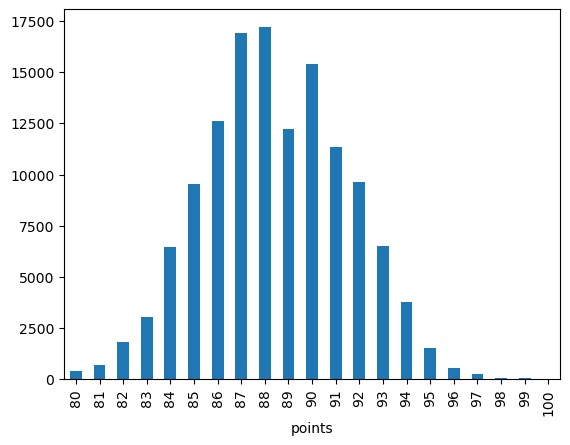

In [559]:
winery_count_points=wine_reviews.groupby("points").winery.count()
winery_count_points.plot(kind="bar")

<Axes: >

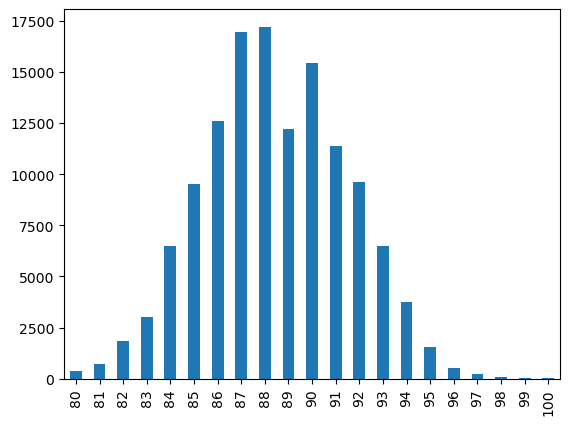

In [560]:
# we can also do it count of number of wines through value_counts()
wine_reviews["points"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='country', ylabel='prices($)'>

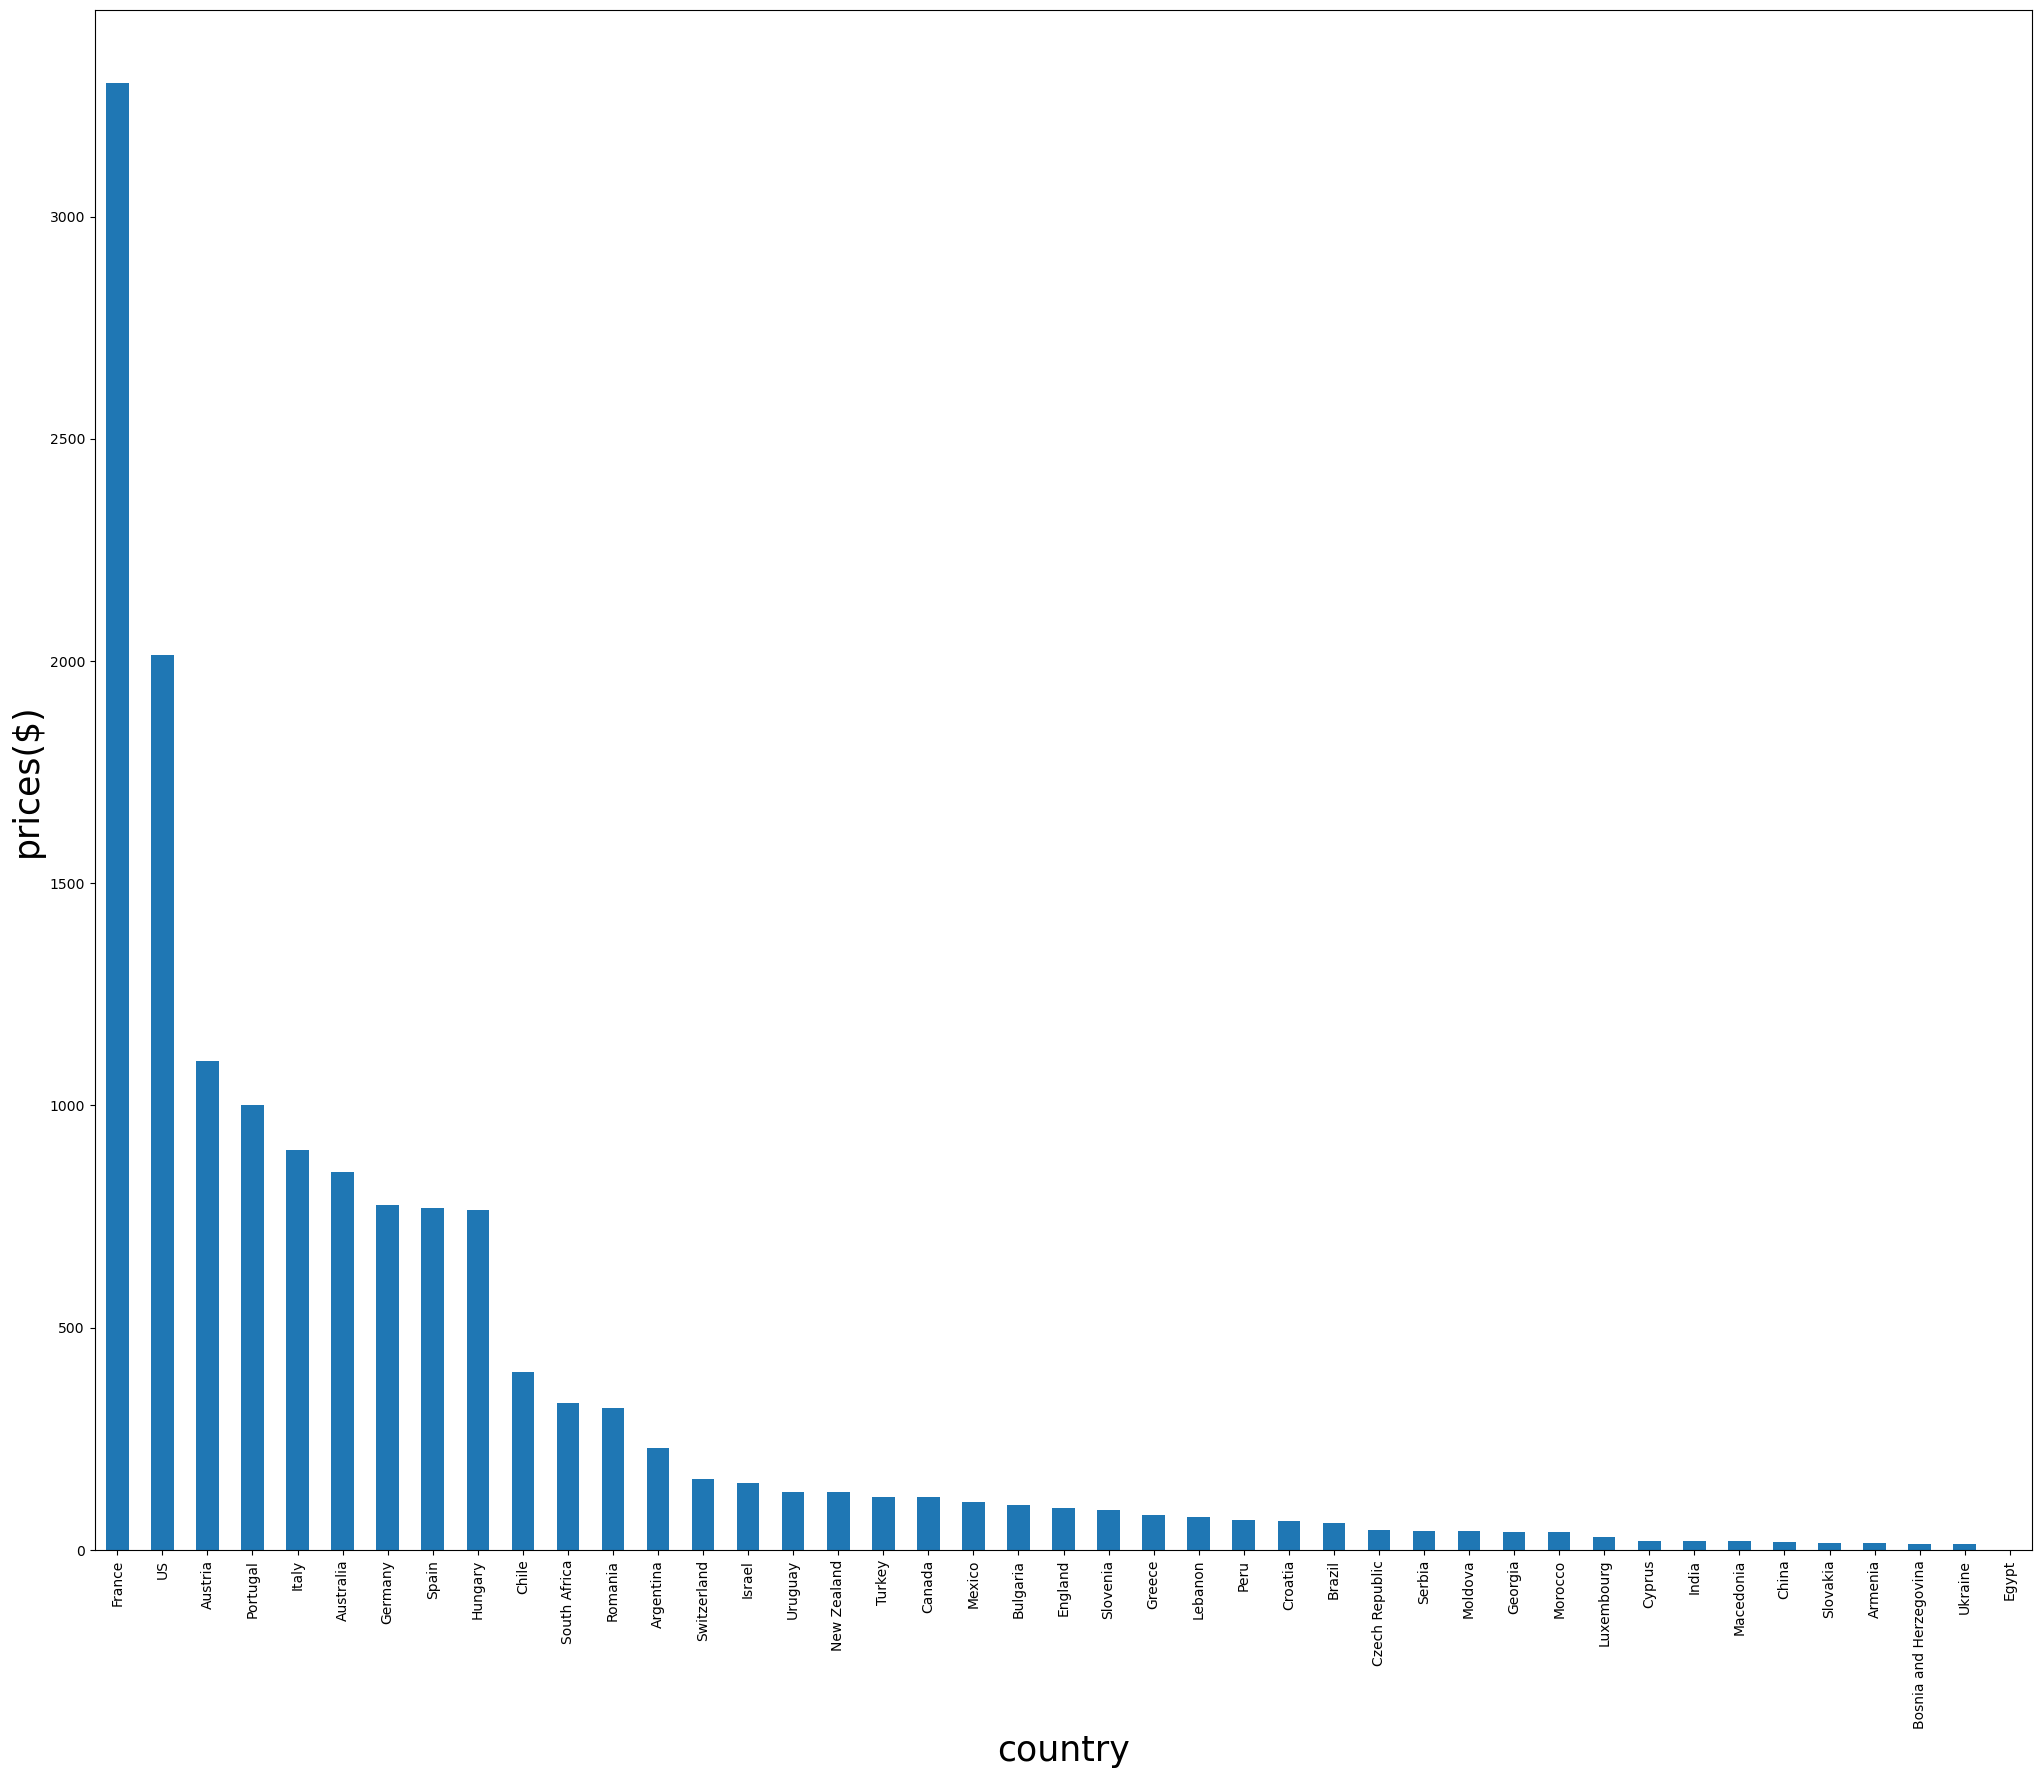

In [561]:
# Which country produce costliest wine
import matplotlib.pyplot as plt
mean_prices_country=wine_reviews.groupby(["country"]).price.max()
sorted_prices=mean_prices_country.sort_values(ascending=False)

fig,axis=plt.subplots(figsize=(25,20))
axis.set_xlabel("country",fontsize="25")
axis.set_ylabel("prices($)",fontsize="25")
sorted_prices.plot(kind="bar")

In [562]:
# for getting the perticular series from as per groupped series dataframe
wine_reviews.groupby("winery").apply(lambda df: df.title)



winery    wines 
1+1=3     20319                        1+1=3 NV Rosé Sparkling (Cava)
          33657     1+1=3 NV Cygnus Brut Nature Reserva Made With ...
          55163                        1+1=3 NV Brut Sparkling (Cava)
          56109     1+1=3 NV Cygnus Brut Nature Reserva Made With ...
          63807          1+1=3 2008 Rosé Cabernet Sauvignon (Penedès)
                                          ...                        
àMaurice  124544           àMaurice 2009 Syrah (Columbia Valley (WA))
          128023       àMaurice NV Pour Me Red (Columbia Valley (WA))
Štoka     10290                       Štoka 2009 Izbrani Teran (Kras)
          70504                    Štoka 2011 Grganja Vitovska (Kras)
          70505                       Štoka 2011 Izbrani Teran (Kras)
Name: title, Length: 129971, dtype: object

In [563]:
# idx_max() function findous out the index of maximum points in the series
wine_reviews.iloc[wine_reviews.points.idxmax()]


fields
country                                                          Australia
description              This wine contains some material over 100 year...
designation                                                           Rare
points                                                                 100
price                                                                350.0
province                                                          Victoria
region_1                                                        Rutherglen
region_2                                                               NaN
taster_name                                                 Joe Czerwinski
taster_twitter_handle                                               @JoeCz
title                    Chambers Rosewood Vineyards NV Rare Muscat (Ru...
variety                                                             Muscat
winery                                         Chambers Rosewood Vineyards
critics           

In [564]:
# Which country and province has best wine?

wine_reviews.groupby(["country","province"]).apply(lambda df: df.loc[df.points.idxmax()])




fields                        country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
Armenia   Armenia             Armenia   
Australia Australia Other   Australia   
          New South Wales   Australia   
...                               ...   
Uruguay   Juanico             Uruguay   
          Montevideo          Uruguay   
          Progreso            Uruguay   
          San Jose            Uruguay   
          Uruguay             Uruguay   

fields                                                            description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
Armenia   Armenia           Deep salmon in color, this wine offers a bouqu...   
Australia Australia Other   Writes the book on how to make a wine filled w...   
          New South Wales   De Bortoli's Noble One is as good as ever in 2...   
...                                                                       ...   
Uruguay   Juanico           This mature Bordeaux-style blend is earthy on ...   
          Montevideo        A rich, heady bouquet offers aromas of blackbe...   
          Progreso          Rusty in color but deep and complex in nature,...   
          San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

fields                                                  designation  points  \
country   province                                                            
Argentina Mendoza Province                         Nicasia Vineyard      97   
          Other                                             Reserva      95   
Armenia   Armenia                                    Estate Bottled      88   
Australia Australia Other                             Sarah's Blend      93   
          New South Wales                        Noble One Bortytis      94   
...                                                             ...     ...   
Uruguay   Juanico                  Preludio Barrel Select Lote N 77      90   
          Montevideo        Monte Vide Eu Tannat-Merlot-Tempranillo      91   
          Progreso                   Etxe Oneko Fortified Sweet Red      90   
          San Jose                         El Preciado Gran Reserva      87   
          Uruguay                         Blend 002 Limited Edition      91   

fields                      price          province                 region_1  \
country   province                                                             
Argentina Mendoza Province  120.0  Mendoza Province                  Mendoza   
          Other              90.0             Other                    Salta   
Armenia   Armenia            15.0           Armenia                      NaN   
Australia Australia Other    15.0   Australia Other  South Eastern Australia   
          New South Wales    32.0   New South Wales          New South Wales   
...                           ...               ...                      ...   
Uruguay   Juanico            45.0           Juanico                      NaN   
          Montevideo         60.0        Montevideo                      NaN   
          Progreso           46.0          Progreso                      NaN   
          San Jose           50.0          San Jose                      NaN   
          Uruguay            22.0           Uruguay                      NaN   

fields                     region_2        taster_name taster_twitter_handle  \
country   province                                                             
Argentina Mendoza Province      NaN  Michael Schachner           @wineschach   
          Other                 NaN  Michael Schachner           @wineschach   
Armenia   Armenia      

In [565]:
# group by allows to run differenct functions on your DataFrame

countries_main_attr=wine_reviews.groupby(["country"]).price.agg([len,min,max])
countries_main_attr.reset_index() 

,country,len,min,max
0,Argentina,3800,4.0,230.0
1,Armenia,2,14.0,15.0
2,Australia,2329,5.0,850.0
3,Austria,3345,7.0,1100.0
4,Bosnia and Herzegovina,2,12.0,13.0
5,Brazil,52,10.0,60.0
6,Bulgaria,141,8.0,100.0
7,Canada,257,12.0,120.0
8,Chile,4472,5.0,400.0
9,China,1,18.0,18.0


In [ ]:
# soring the the dataframe
countries_main_attr.sort_values(by="max",ascending=False)

# Combine DataFrame/Series

In [ ]:
# The middlemost combiner in terms of complexity is join(). 
# join() lets you combine different DataFrame objects which have an index in common.

In [566]:
ca_vid=pd.read_csv("/kaggle/input/youtube-trending-video-dataset/CA_youtube_trending_data.csv")

In [567]:
br_vid=pd.read_csv("/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv")

In [568]:
# contact function adds the second data to the rows of data
pd.concat([ca_vid,br_vid])

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204586,Bdb9h9DbfxI,"A Cada GOL do RONALDO, é + 1 OVERALL",2023-05-19T17:30:01Z,UCD9cMUkHNW380sh3_YedolA,MuuhPro,20,2023-05-27T00:00:00Z,Fifa 23|Fifa|Fifa 23 gameplay|Gameplay|Much|Mu...,740139,19887,0,399,https://i.ytimg.com/vi/Bdb9h9DbfxI/default.jpg,False,False,"A Cada gol que o Ronaldo marcar, é + 1 upgrade..."
204587,HUa7l7mYhO4,LW - Identidade (Official Visualizer) prod. @m...,2023-05-19T14:00:09Z,UCMbAgyBjVNCOevss0vGKNCQ,MY CONQUISTER [LW],10,2023-05-27T00:00:00Z,[None],381173,73523,0,4694,https://i.ytimg.com/vi/HUa7l7mYhO4/default.jpg,False,False,Ouça nas plataformas digitais.Ficha Técnica: ...
204588,KkbHI3cB7dk,♫ CITY HUMILHA O REAL MADRID E TÁ NA FINAL DA ...,2023-05-19T16:10:53Z,UCGFNp4Pialo9wjT9Bo8wECA,FutParódias,17,2023-05-27T00:00:00Z,Futebol|FutParodias|Paródia|futparodia|futepar...,1119802,65855,0,1871,https://i.ytimg.com/vi/KkbHI3cB7dk/default.jpg,False,False,Uma paródia de futebol da música Agudo Mágico ...
204589,Faptmt0Lflo,A Cada XP eu fico mais RÁPIDO!,2023-05-20T14:15:01Z,UCbWYmIdZ2hpVMpPhRI9pI5Q,Cadres,20,2023-05-27T00:00:00Z,[None],303436,7502,0,131,https://i.ytimg.com/vi/Faptmt0Lflo/default.jpg,False,False,🔸Instagram: https://www.instagram.com/cadresss...


In [569]:
# join adds the second dataset to the first data
# joins only if the two datasets index are equal
#lsuffix indicates the dist
left = ca_vid.set_index(['title', 'trending_date'])
right = br_vid.set_index(['title', 'trending_date'])

left.join(right, lsuffix='_CAN', rsuffix='_UK')

video_id_CAN  \
title                                              trending_date                       
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast... 2021-01-01T00:00:00Z  3BgG4bUDHa4   
                                                   2021-01-03T00:00:00Z  3BgG4bUDHa4   
                                                   2021-01-04T00:00:00Z  3BgG4bUDHa4   
                                                   2021-01-05T00:00:00Z  3BgG4bUDHa4   
                                                   2021-01-06T00:00:00Z  3BgG4bUDHa4   
...                                                                              ...   
🪐A-t-on trouvé le bord de l'Univers ?              2022-09-18T00:00:00Z  zma6iLtN6-c   
                                                   2022-09-19T00:00:00Z  zma6iLtN6-c   
                                                   2022-09-20T00:00:00Z  zma6iLtN6-c   
                                                   2022-09-21T00:00:00Z  zma6iLtN6-c   
                                                   2022-09-22T00:00:00Z  zma6iLtN6-c   

                                                                              publishedAt_CAN  \
title                                              trending_date                                
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast... 2021-01-01T00:00:00Z  2020-12-30T17:43:29Z   
                                                   2021-01-03T00:00:00Z  2020-12-30T17:43:29Z   
                                                   2021-01-04T00:00:00Z  2020-12-30T17:43:29Z   
                                                   2021-01-05T00:00:00Z  2020-12-30T17:43:29Z   
                                                   2021-01-06T00:00:00Z  2020-12-30T17:43:29Z   
...                                                                                       ...   
🪐A-t-on trouvé le bord de l'Univers ?              2022-09-18T00:00:00Z  2022-09-17T08:00:32Z   
                                                   2022-09-19T00:00:00Z  2022-09-17T08:00:32Z   
                                                   2022-09-20T00:00:00Z  2022-09-17T08:00:32Z   
                                                   2022-09-21T00:00:00Z  2022-09-17T08:00:32Z   
                                                   2022-09-22T00:00:00Z  2022-09-17T08:00:32Z   

                                                                                    channelId_CAN  \
title                                              trending_date                                    
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast... 2021-01-01T00:00:00Z  UCL5YbN5WLFD8dLIegT5QAbA   
                                                   2021-01-03T00:00:00Z  UCL5YbN5WLFD8dLIegT5QAbA   
                                                   2021-01-04T00:00:00Z  UCL5YbN5WLFD8dLIegT5QAbA   
                                                   2021-01-05T00:00:00Z  UCL5YbN5WLFD8dLIegT5QAbA   
                                                   2021-01-06T00:00:00Z  UCL5YbN5WLFD8dLIegT5QAbA   
...                                                                                           ...   
🪐A-t-on trouvé le bord de l'Univers ?              2022-09-18T00:00:00Z  UC5X4e8ScZI2AFd_vkjSoyoQ   
                                                   2022-09-19T00:00:00Z  UC5X4e8ScZI2AFd_vkjSoyoQ   
                                                   2022-09-20T00:00:00Z  UC5X4e8ScZI2AFd_vkjSoyoQ   
                                                   2022-09-21T00:00:00Z  UC5X4e8ScZI2AFd_vkjSoyoQ   
                                                   2022-09-22T00:00:00Z  UC5X4e8ScZI2AFd_vkjSoyoQ   

                                                                                  channelTitle_CAN  \
title                                              trending_date                                     
!@#$%$#!! || Dubov vs Carlsen || Airthings Mast... 2021-01-01T00:00:00Z  agadmator's Chess Channel   
                                             

In [570]:
a=wine_reviews.taster_twitter_handle.value_counts().reset_index()
b=a.rename(columns={"index":"taster_twitter_handle","taster_twitter_handle":"count"})


b["taster_twitter_handle"]

0           @vossroger
1          @wineschach
2         @kerinokeefe
3              @vboone
4          @paulgwine 
5        @mattkettmann
6               @JoeCz
7        @wawinereport
8     @gordone_cellars
9          @AnneInVino
10           @laurbuzz
11       @suskostrzewa
12      @worldwineguys
13            @bkfiona
14     @winewchristina
Name: taster_twitter_handle, dtype: object

In [572]:
taster_count=wine_reviews.taster_twitter_handle.value_counts()
taster_count.index.name="taster_twitter_handle"

Text(0.5, 1.0, 'Frequent tasters')

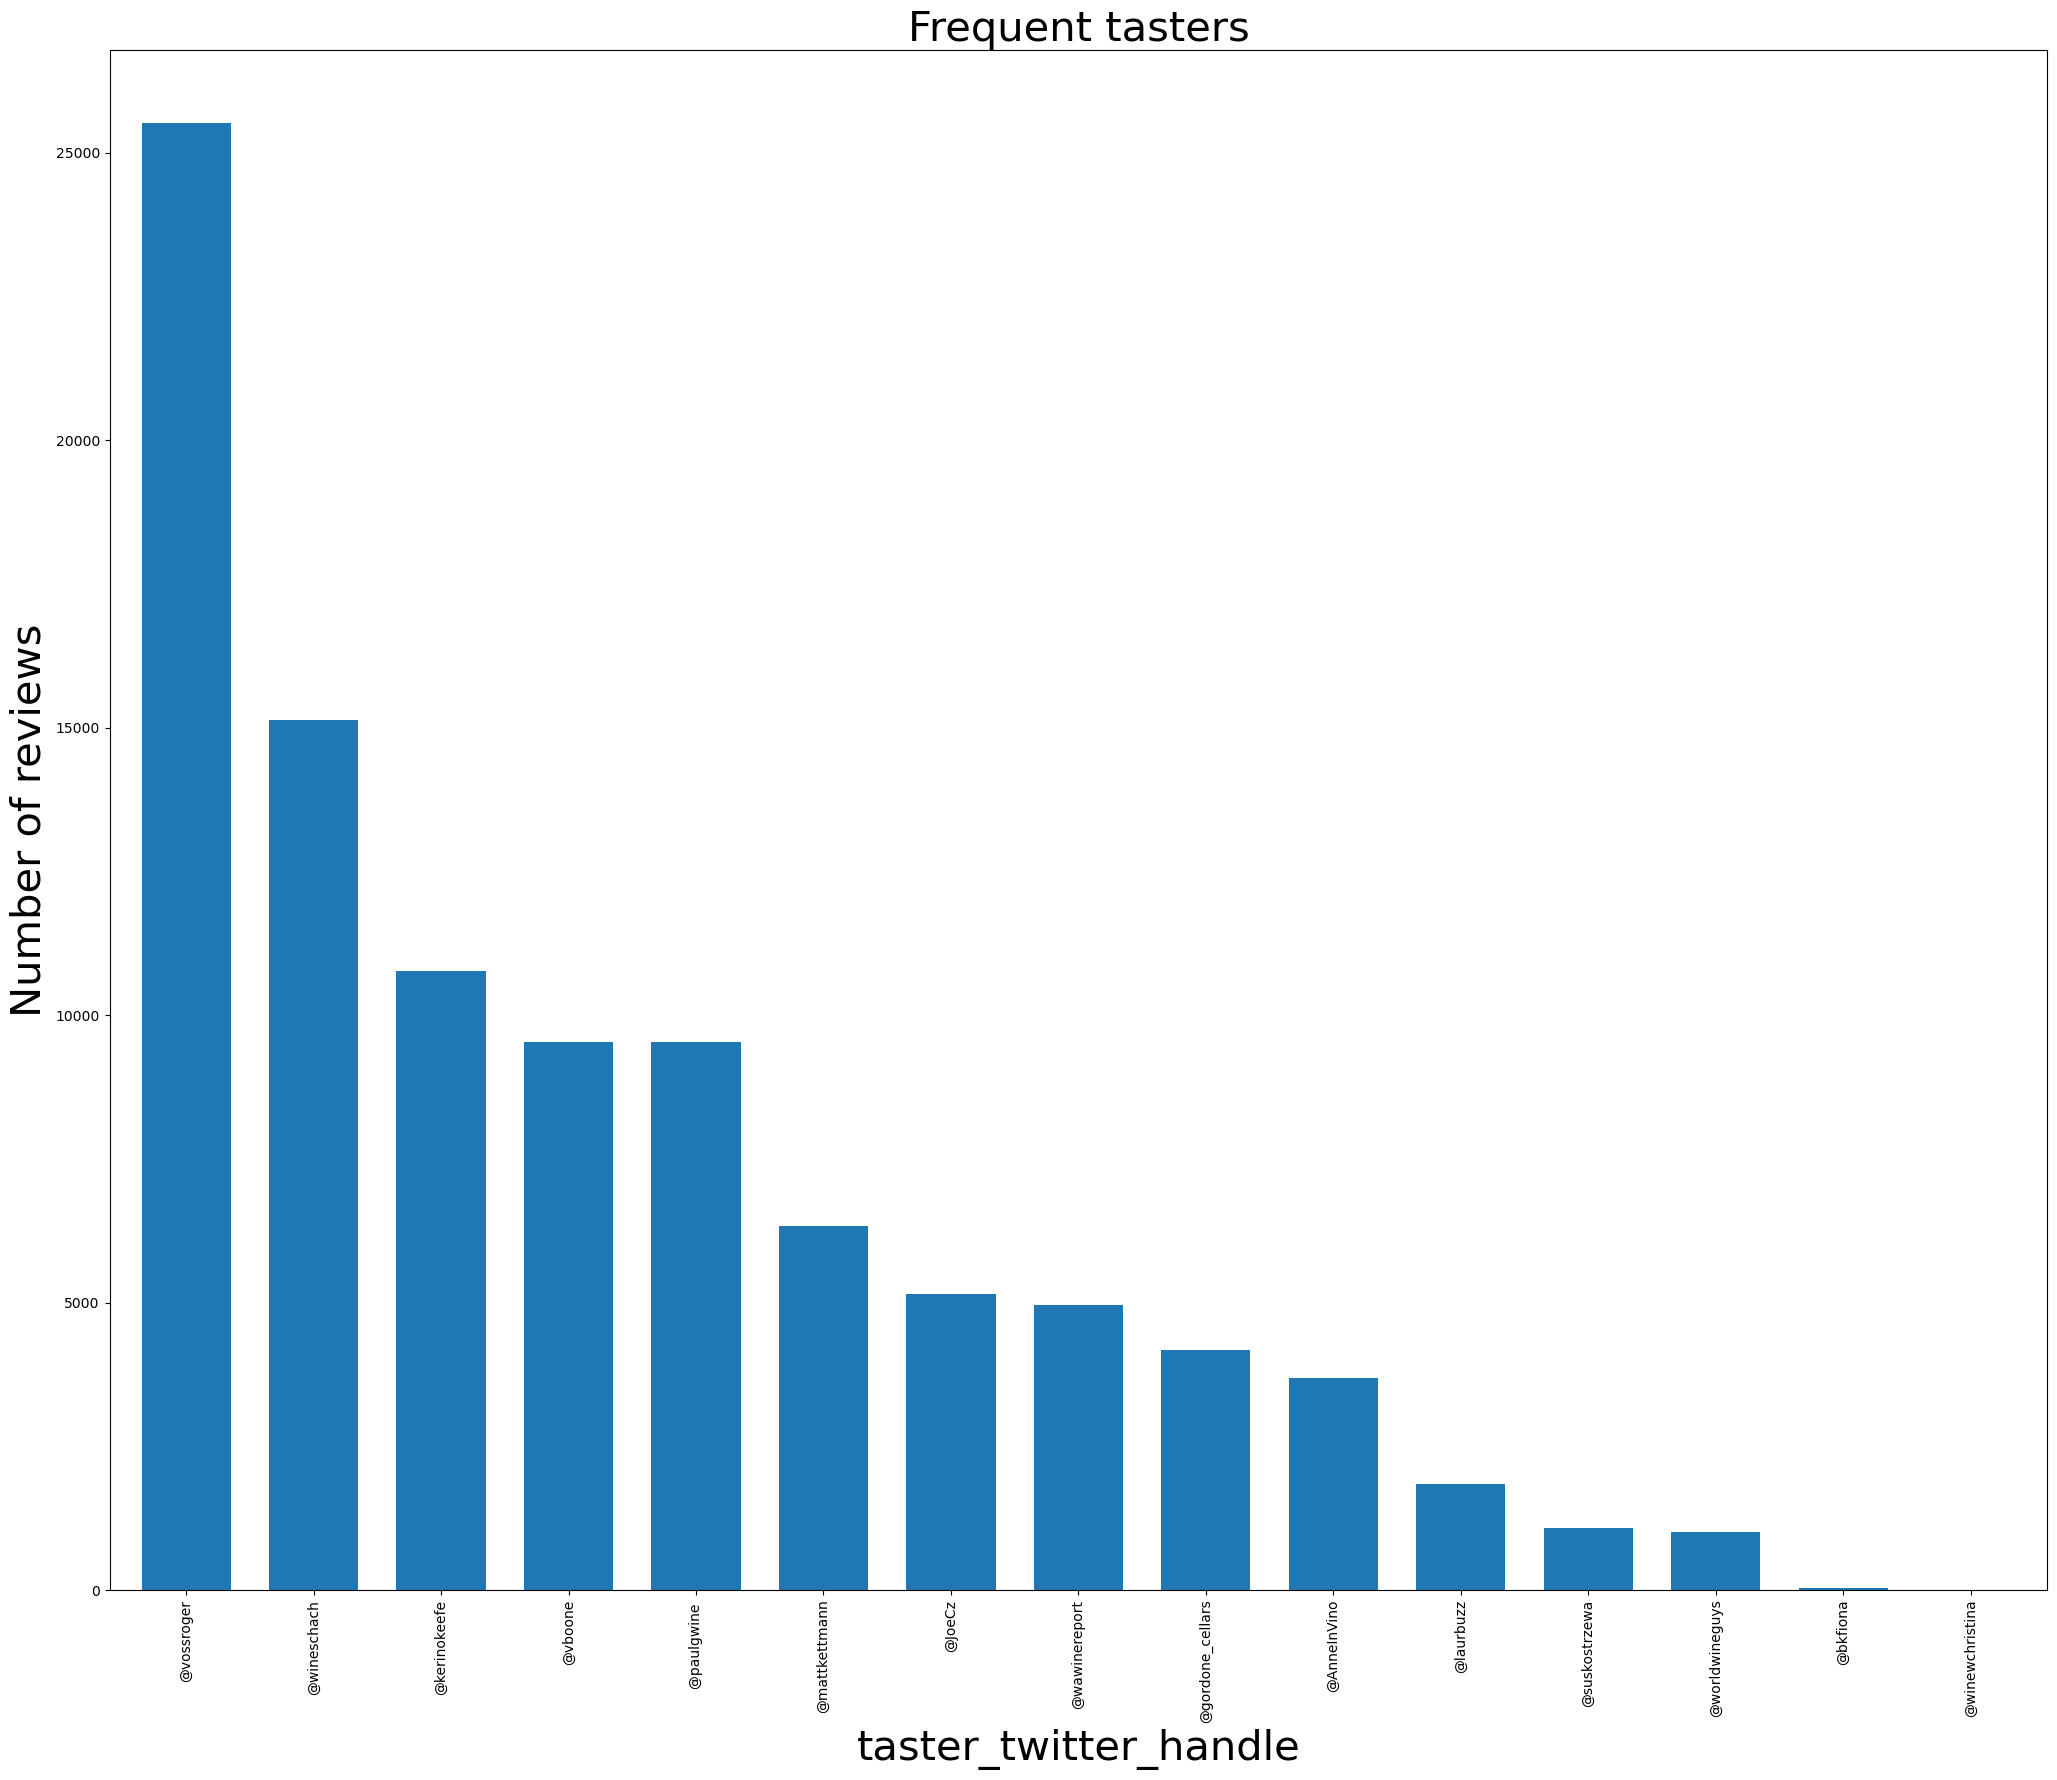

In [573]:
import seaborn as sns
reviews_count=wine_reviews.groupby("taster_twitter_handle").taster_twitter_handle.count().sort_values(ascending=False)

fig,axis=plt.subplots()
reviews_count.plot(kind="bar",figsize=(25,20),width=0.7)
axis.set_xlabel(xlabel="taster_twitter_handle",fontsize=30)
axis.set_ylabel("Number of reviews",fontsize=30)
axis.set_title("Frequent tasters",fontsize=30)


In [574]:
wine_reviews.groupby(["price"]).points.max()

price
4.0       86
5.0       87
6.0       88
7.0       91
8.0       91
          ..
1900.0    98
2000.0    97
2013.0    91
2500.0    96
3300.0    88
Name: points, Length: 390, dtype: int64

<Axes: xlabel='variety'>

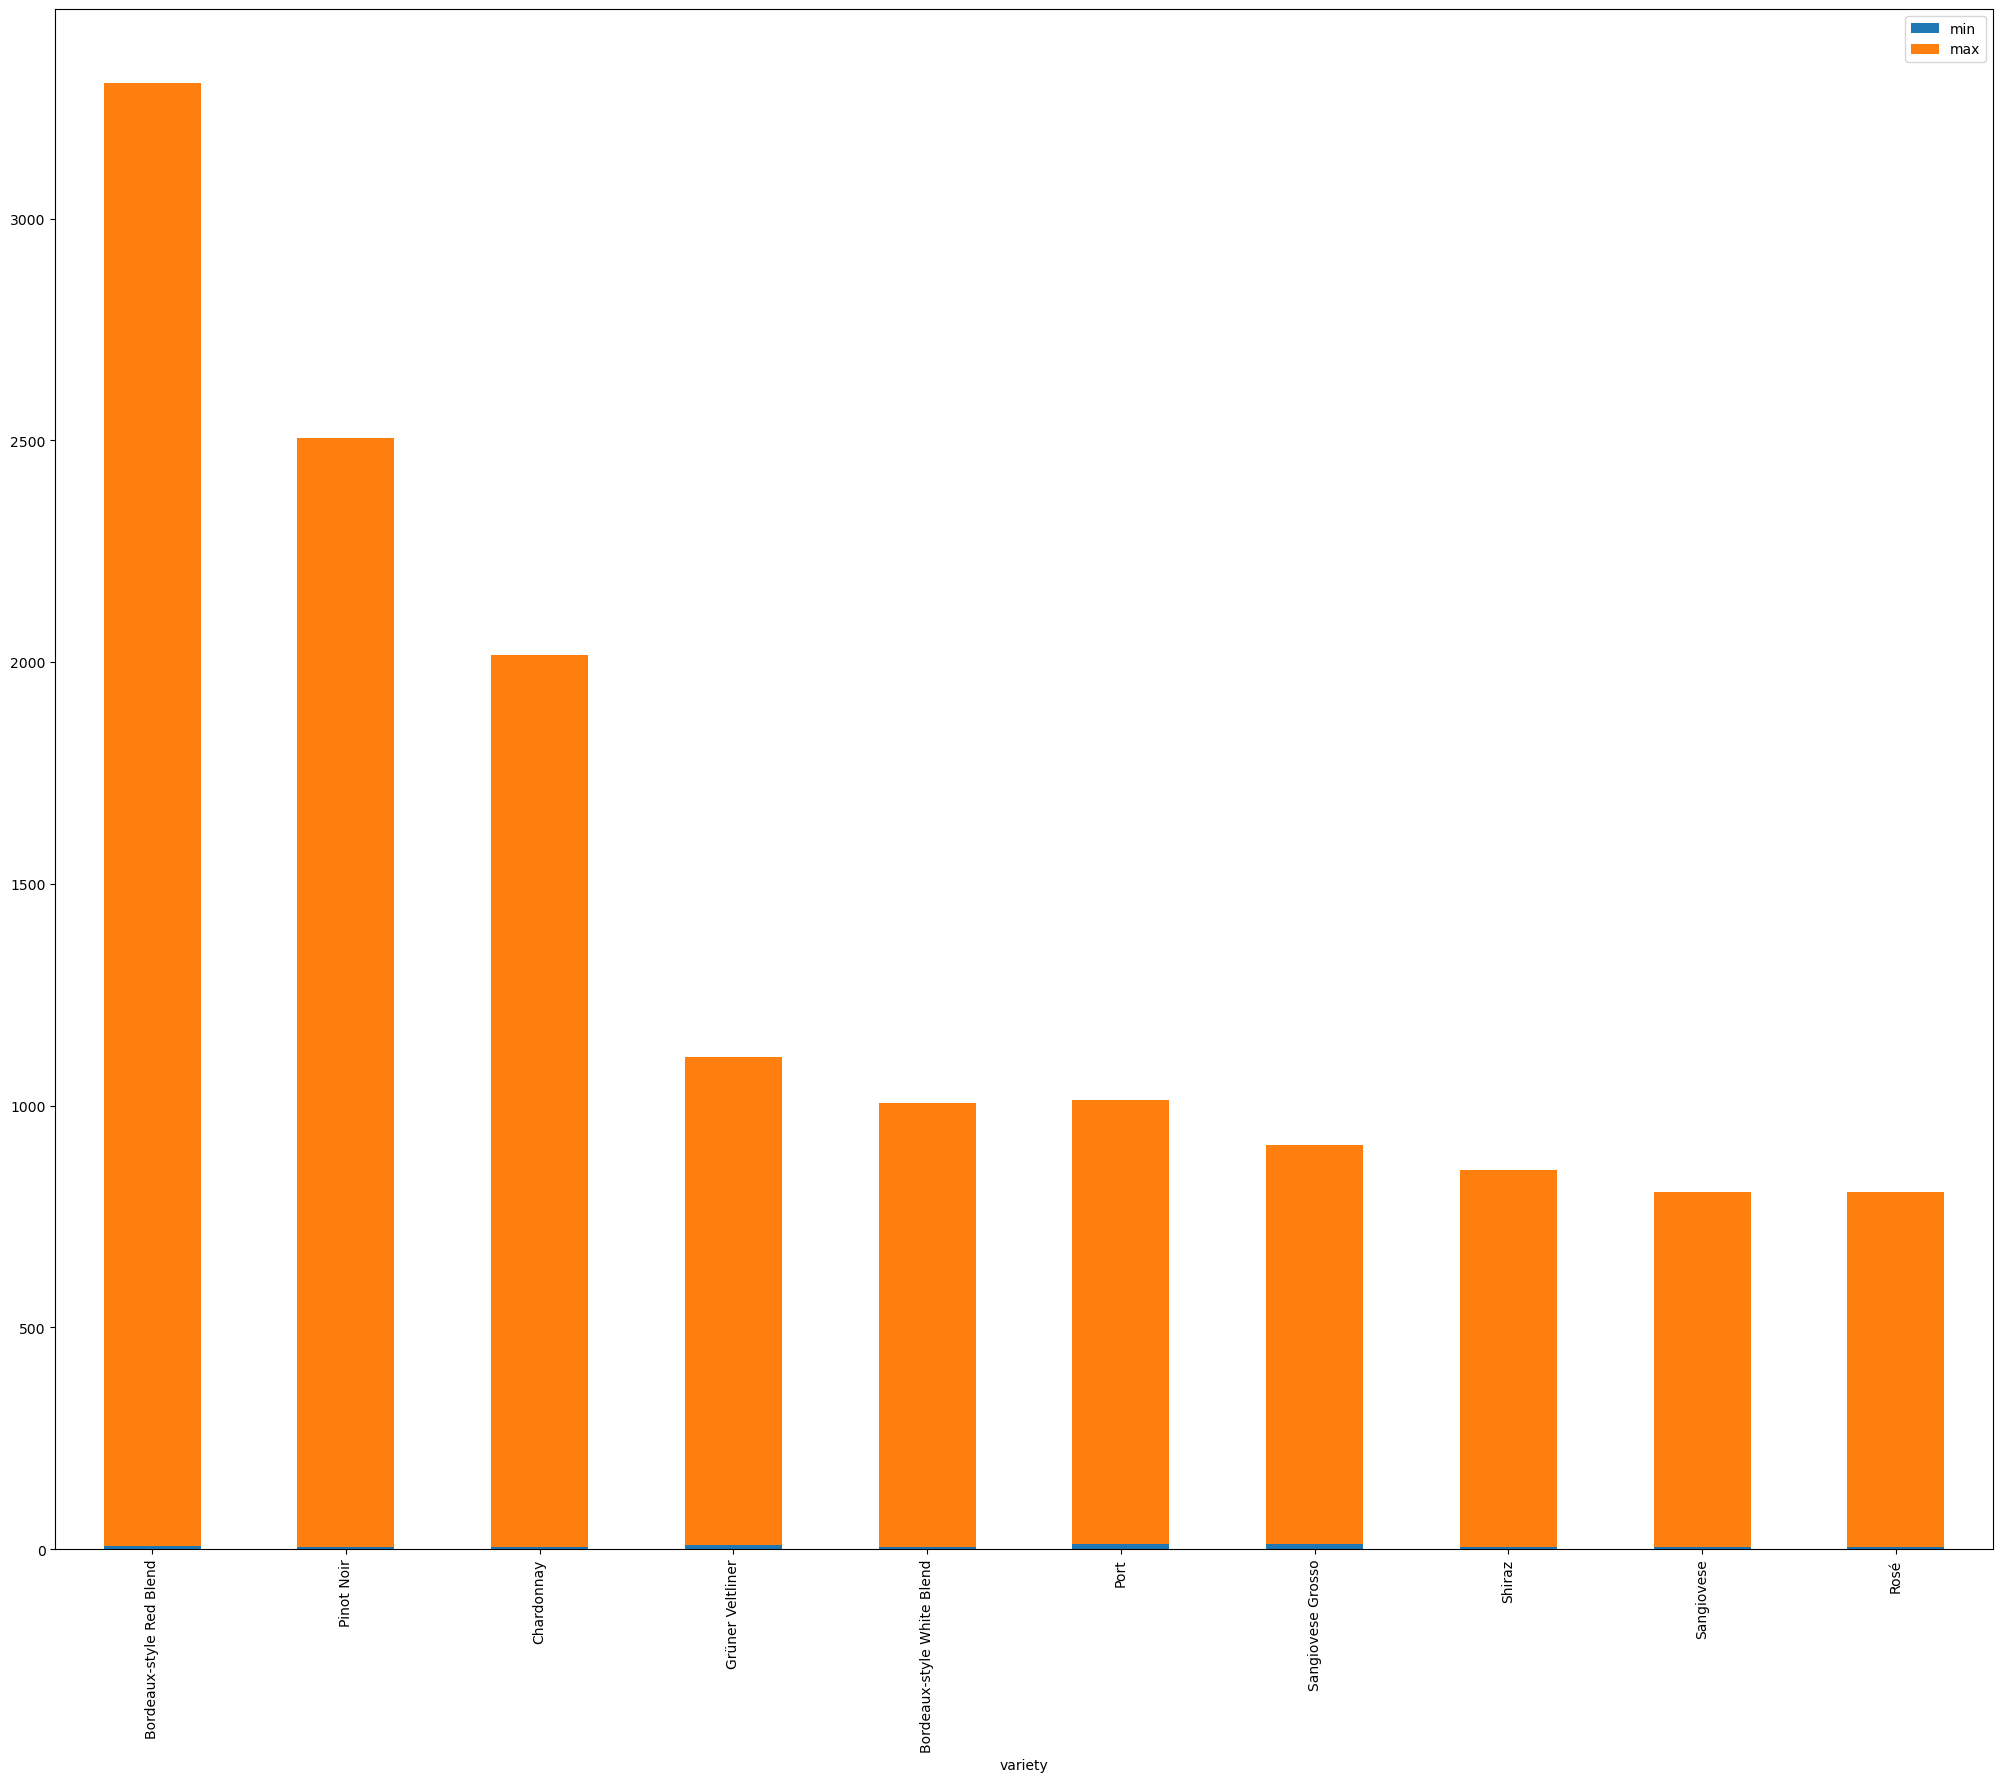

In [575]:
# varirties of first 10 wines that are costliest and cheapest
varieties_price_range=wine_reviews.groupby(["variety"]).price.agg([min,max]).sort_values(by="max",
                                                              ascending=False)
fig,axis=plt.subplots()

varieties_price_range[:10].plot(kind="bar",figsize=(25,20),stacked=True,ax=axis)



In [576]:
#The size() function is then applied to the grouped data, which returns the number of occurrences or count of each unique combination of country and variety. 
#Essentially, it counts how many instances of each unique combination exist in the DataFrame.

wine_reviews.groupby(["country","variety"]).size()


country    variety                   
Argentina  Barbera                         1
           Bonarda                       105
           Bordeaux-style Red Blend       89
           Bordeaux-style White Blend      1
           Cabernet Blend                  8
                                        ... 
Uruguay    Tannat-Cabernet Franc           2
           Tannat-Merlot                   6
           Tannat-Syrah                    1
           Tempranillo-Tannat              1
           White Blend                     1
Length: 1612, dtype: int64

In [577]:
#best wines for cheaper price in india :
indian_wines=wine_reviews.loc[wine_reviews["country"]=="India"]
indian_wines.groupby(["country","variety","points"]).price.min().sort_values()

country  variety          points
India    Chenin Blanc     90        10.0
                          87        12.0
         Sauvignon Blanc  89        12.0
                          90        12.0
         Shiraz           91        12.0
                          90        13.0
                          92        19.0
                          93        20.0
Name: price, dtype: float64